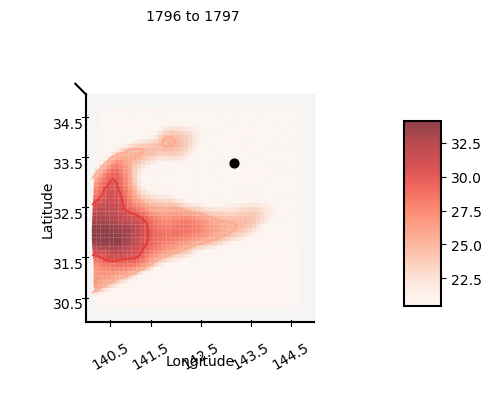

<Figure size 640x480 with 0 Axes>

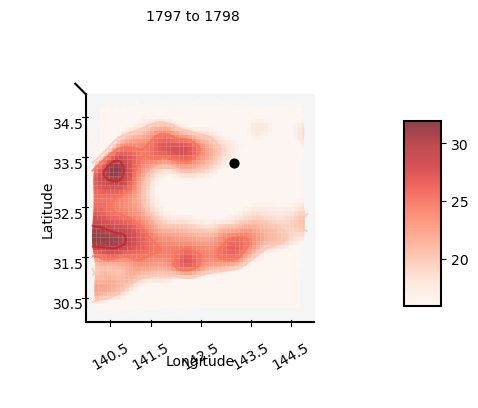

<Figure size 640x480 with 0 Axes>

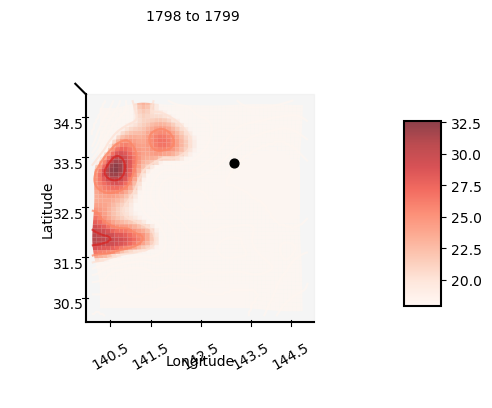

<Figure size 640x480 with 0 Axes>

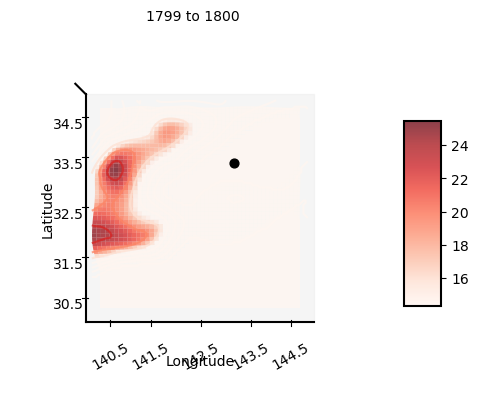

<Figure size 640x480 with 0 Axes>

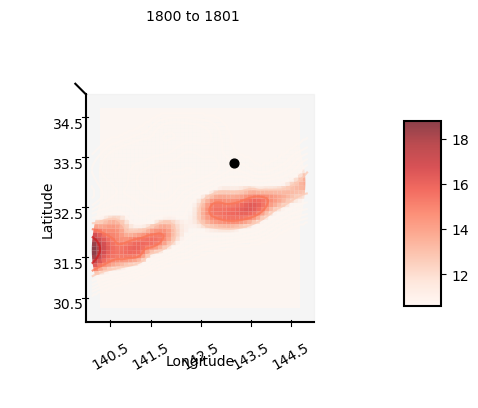

<Figure size 640x480 with 0 Axes>

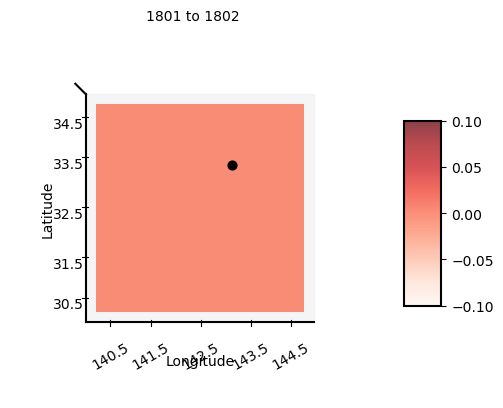

<Figure size 640x480 with 0 Axes>

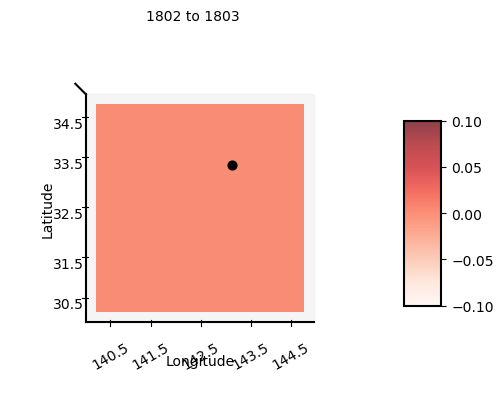

<Figure size 640x480 with 0 Axes>

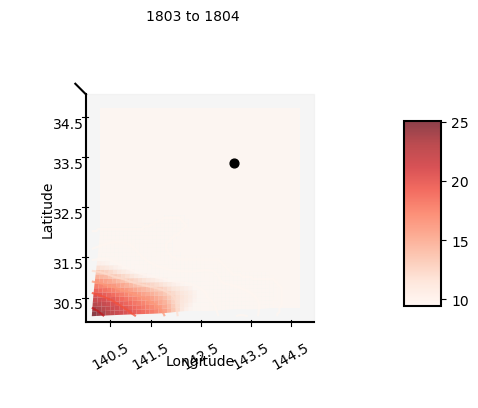

<Figure size 640x480 with 0 Axes>

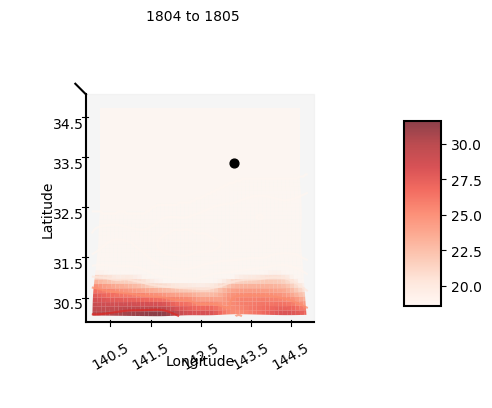

<Figure size 640x480 with 0 Axes>

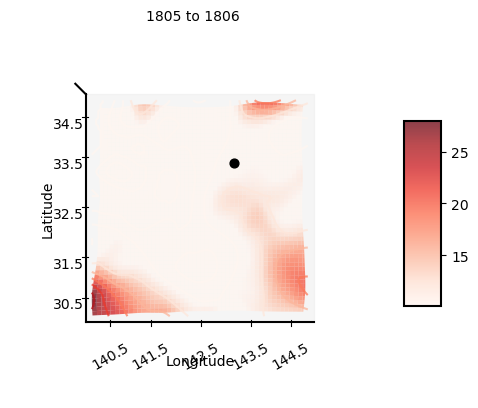

<Figure size 640x480 with 0 Axes>

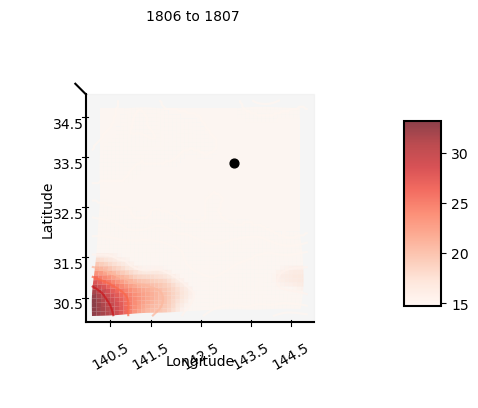

<Figure size 640x480 with 0 Axes>

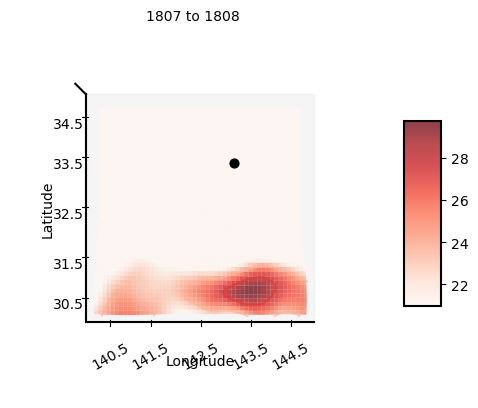

<Figure size 640x480 with 0 Axes>

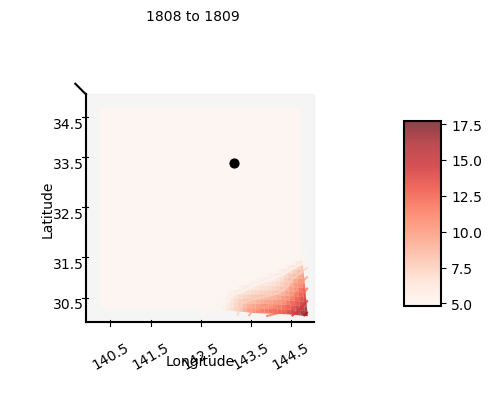

<Figure size 640x480 with 0 Axes>

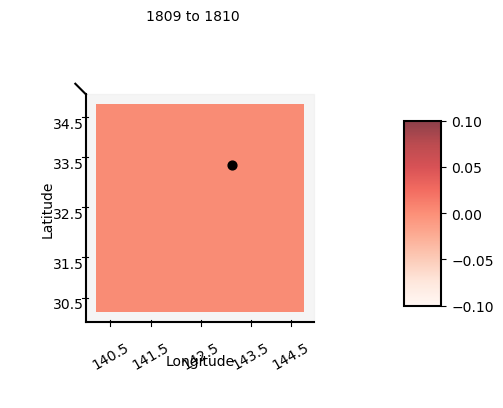

<Figure size 640x480 with 0 Axes>

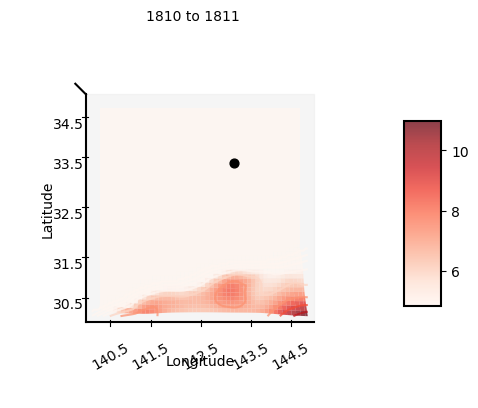

<Figure size 640x480 with 0 Axes>

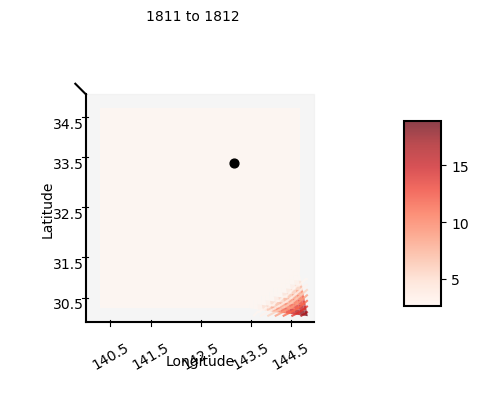

<Figure size 640x480 with 0 Axes>

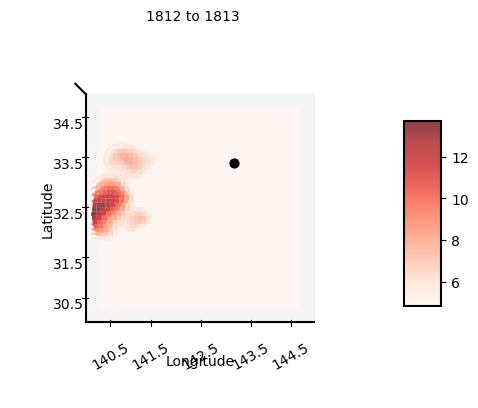

<Figure size 640x480 with 0 Axes>

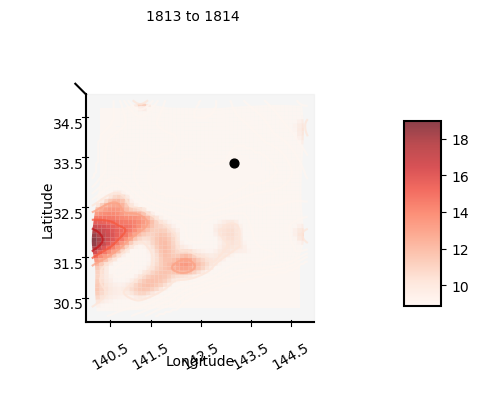

<Figure size 640x480 with 0 Axes>

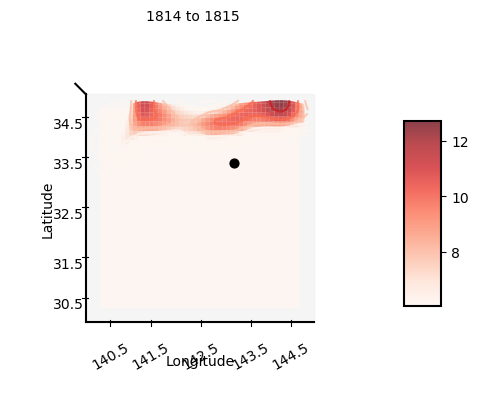

<Figure size 640x480 with 0 Axes>

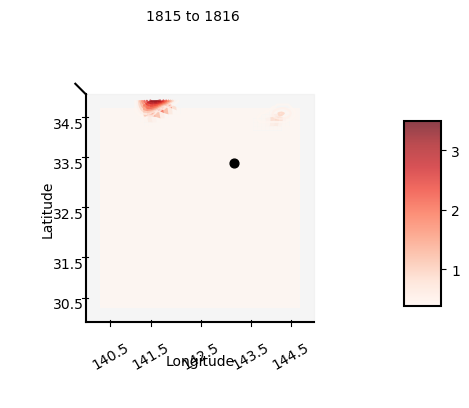

<Figure size 640x480 with 0 Axes>

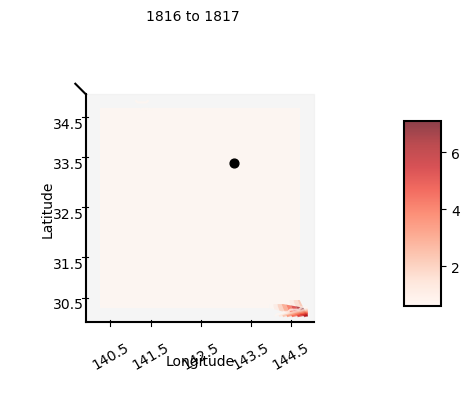

<Figure size 640x480 with 0 Axes>

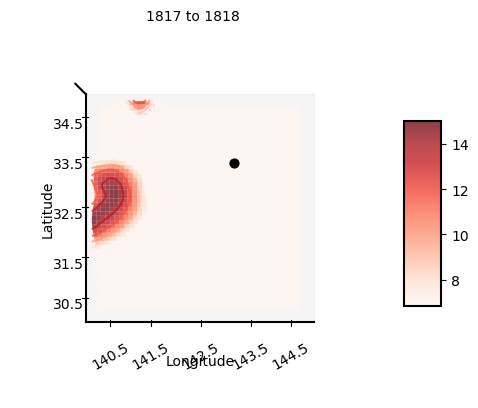

<Figure size 640x480 with 0 Axes>

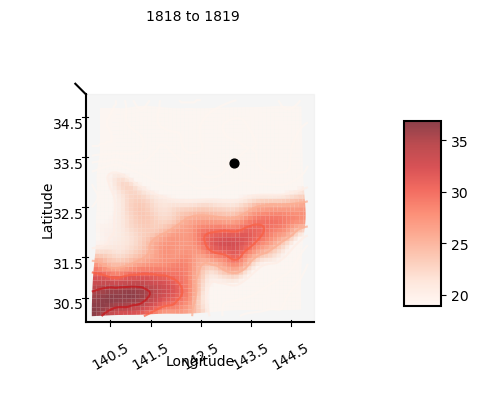

<Figure size 640x480 with 0 Axes>

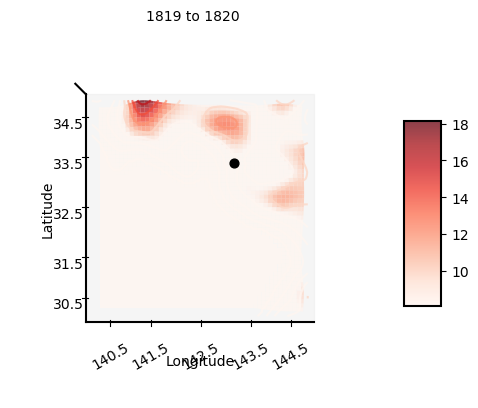

<Figure size 640x480 with 0 Axes>

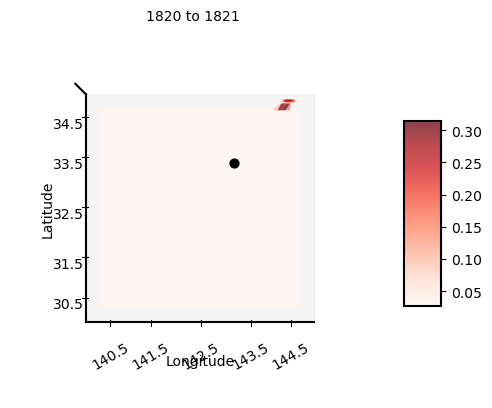

<Figure size 640x480 with 0 Axes>

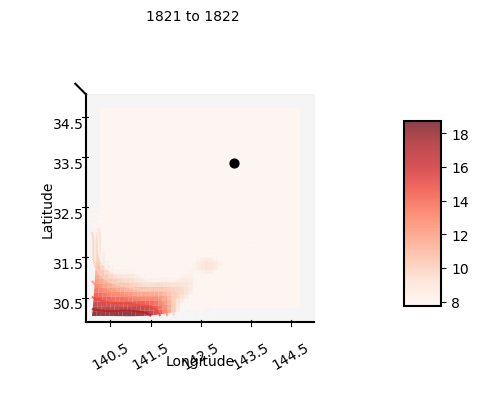

<Figure size 640x480 with 0 Axes>

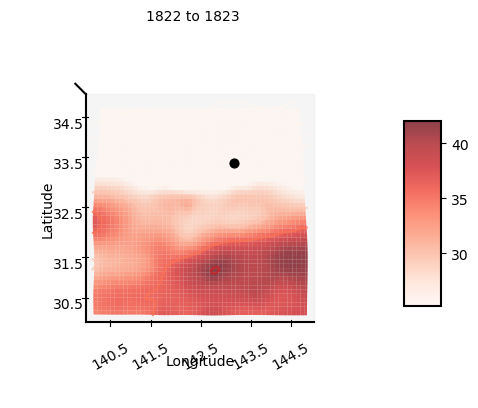

<Figure size 640x480 with 0 Axes>

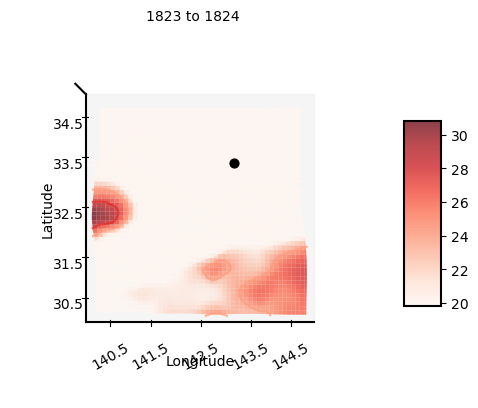

<Figure size 640x480 with 0 Axes>

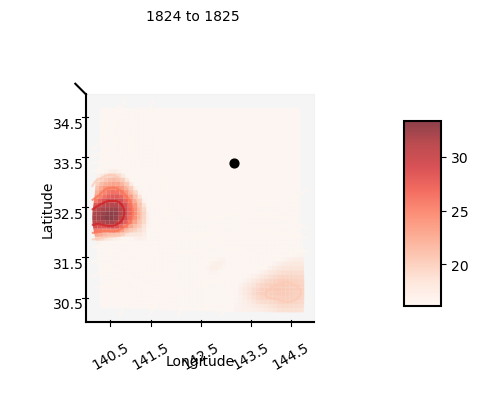

<Figure size 640x480 with 0 Axes>

            OLR
0     17.993935
1     14.502137
2     11.976711
3     12.290159
4     23.880115
...         ...
1821   0.693922
1822  19.524011
1823  42.144498
1824  31.217546
1825  33.629781

[1826 rows x 1 columns]


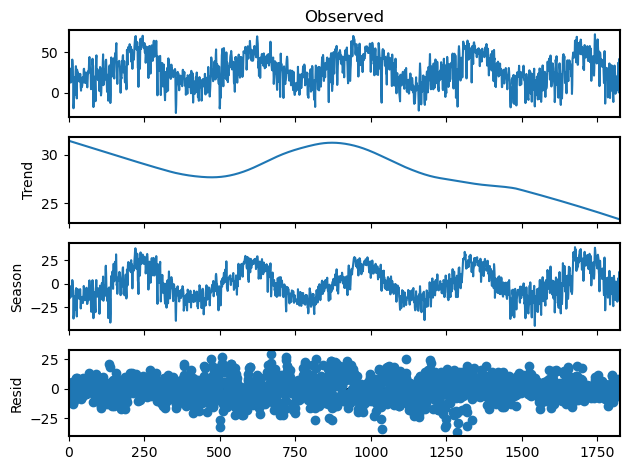

series:  -0.6124314484957978
series1:  0.2350464725098398
i: 0
value:  -0.6124314484957978
i: 1
value:  0.2350464725098398
i: 2
value:  -7.528591316714927
i: 3
value:  -3.652104454315648
i: 4
value:  1.409992938339233
i: 5
value:  -1.9030000952422483
i: 6
value:  -1.3774620167588765
i: 7
value:  1.3084611387259137
i: 8
value:  -4.418233709975443
i: 9
value:  4.584186463863858
i: 10
value:  3.4866954483217576
i: 11
value:  5.1453258486070474
i: 12
value:  5.887280800789856
i: 13
value:  2.1706926967784135
i: 14
value:  -2.0092851940277647
i: 15
value:  -8.312994030966081
i: 16
value:  -13.095156064610034
i: 17
value:  -10.468622096051206
i: 18
value:  -1.8688545852767575
i: 19
value:  3.959871248286447
i: 20
value:  -0.5200674916159116
i: 21
value:  -1.5653276213429628
i: 22
value:  -5.831166466342431
i: 23
value:  9.226473350266957
i: 24
value:  8.126686921842431
i: 25
value:  1.7845990205201154
i: 26
value:  -2.0299019357514787
i: 27
value:  -3.12909797665165
i: 28
value:  8.937054571

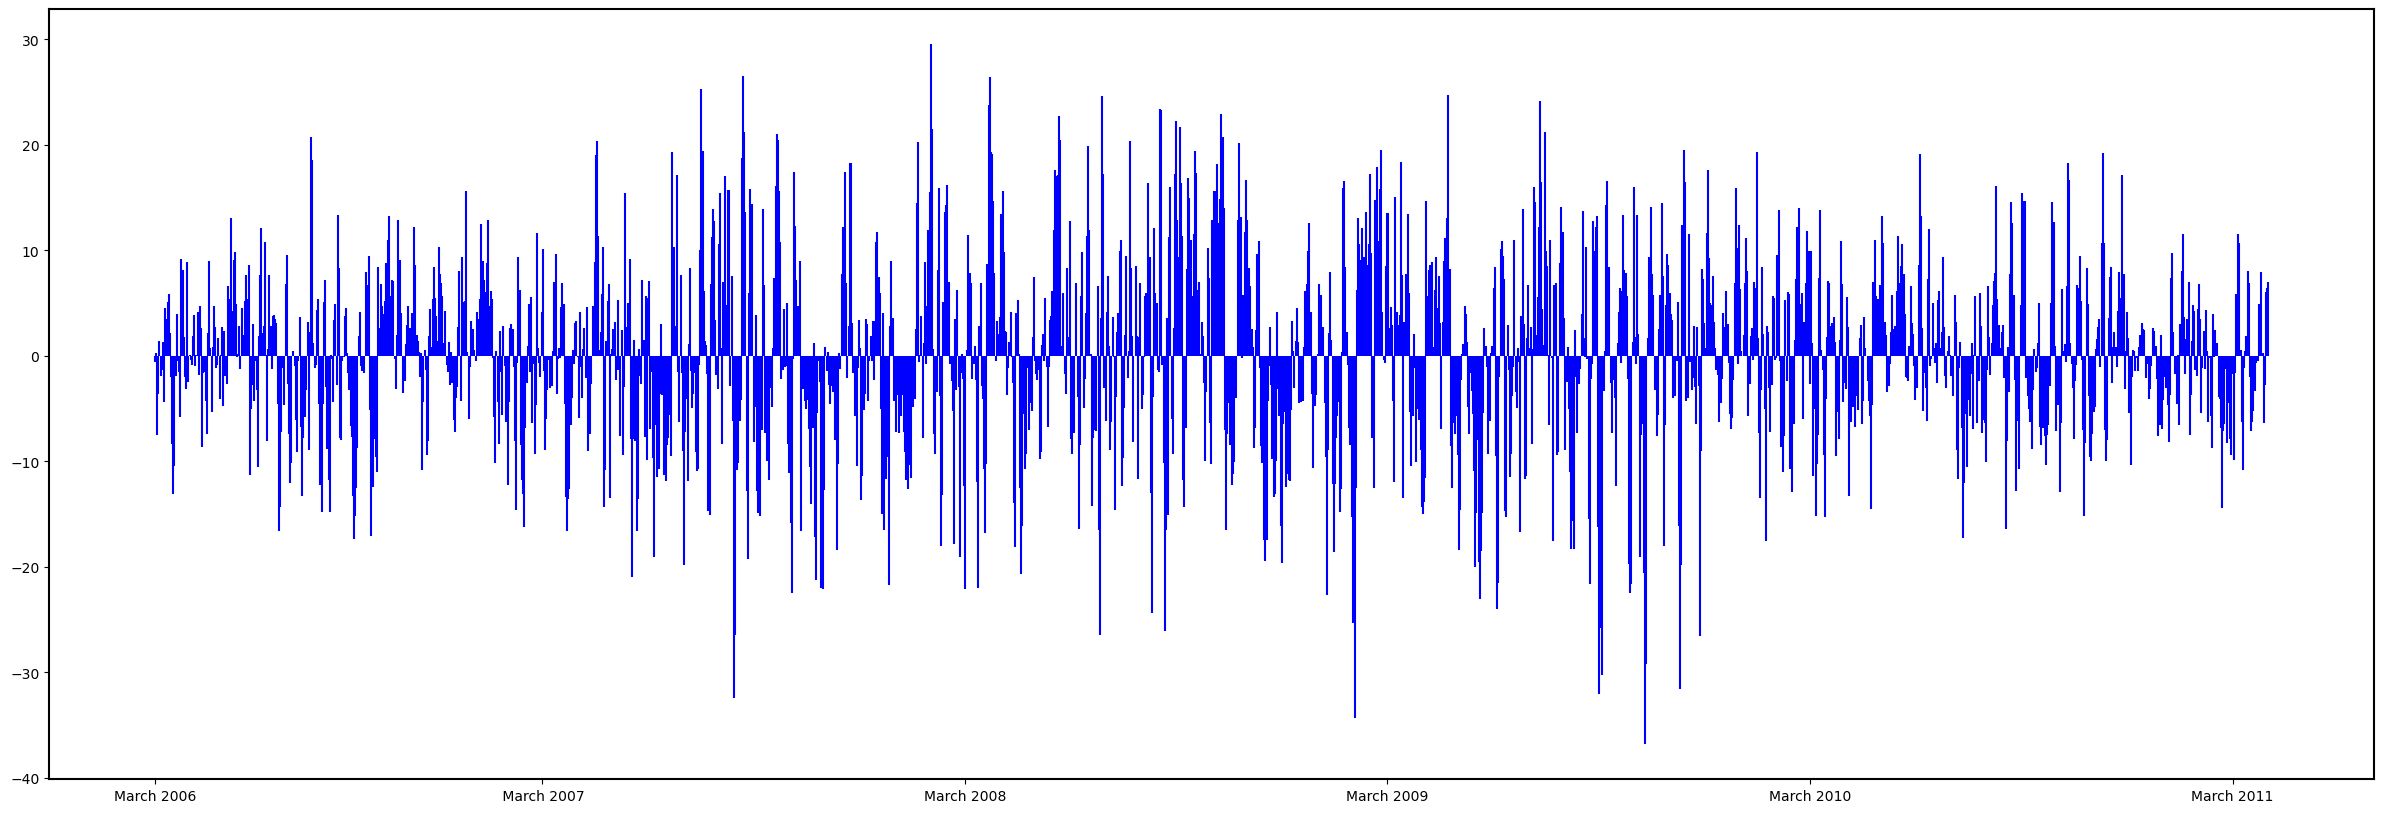

std1:  8.858343372695822
area:  267
area:  69
2
std1:  14.3558567121446
area:  69
Reason Skipped: Not Suitable --> 0.0
2
std1:  17.049516607118854
Reason Skipped: Not Suitable --> 0.0
Reason Skipped: Not Suitable --> 0.0
2
std1:  15.797853410575964
Reason Skipped: Not Suitable --> 0.0
Reason Skipped: Not Suitable --> 0.0
2
std1:  21.253618547678695
Reason Skipped: Not Suitable --> 0.0
Reason Skipped: Not Suitable --> 0.0
2
std1:  15.365481028433422
Reason Skipped: Not Suitable --> 0.0
area:  347
2
std1:  7.4965094826874195
area:  347
Reason Skipped: Not Suitable --> 0.0
2
std1:  7.9898072929213555
Reason Skipped: Not Suitable --> 0.0
area:  35
2
std1:  13.036482690073978
area:  35
area:  84
2
std1:  7.202460124525892
area:  84
area:  53
2
std1:  8.672427581705083
area:  53
area:  98
2
std1:  12.615347381095013
area:  98
area:  110
2
std1:  9.878831659969963
area:  110
Reason Skipped: Not Suitable --> 0.0
2
std1:  8.202288868649608
Reason Skipped: Not Suitable --> 0.0
Reason Skipped: No

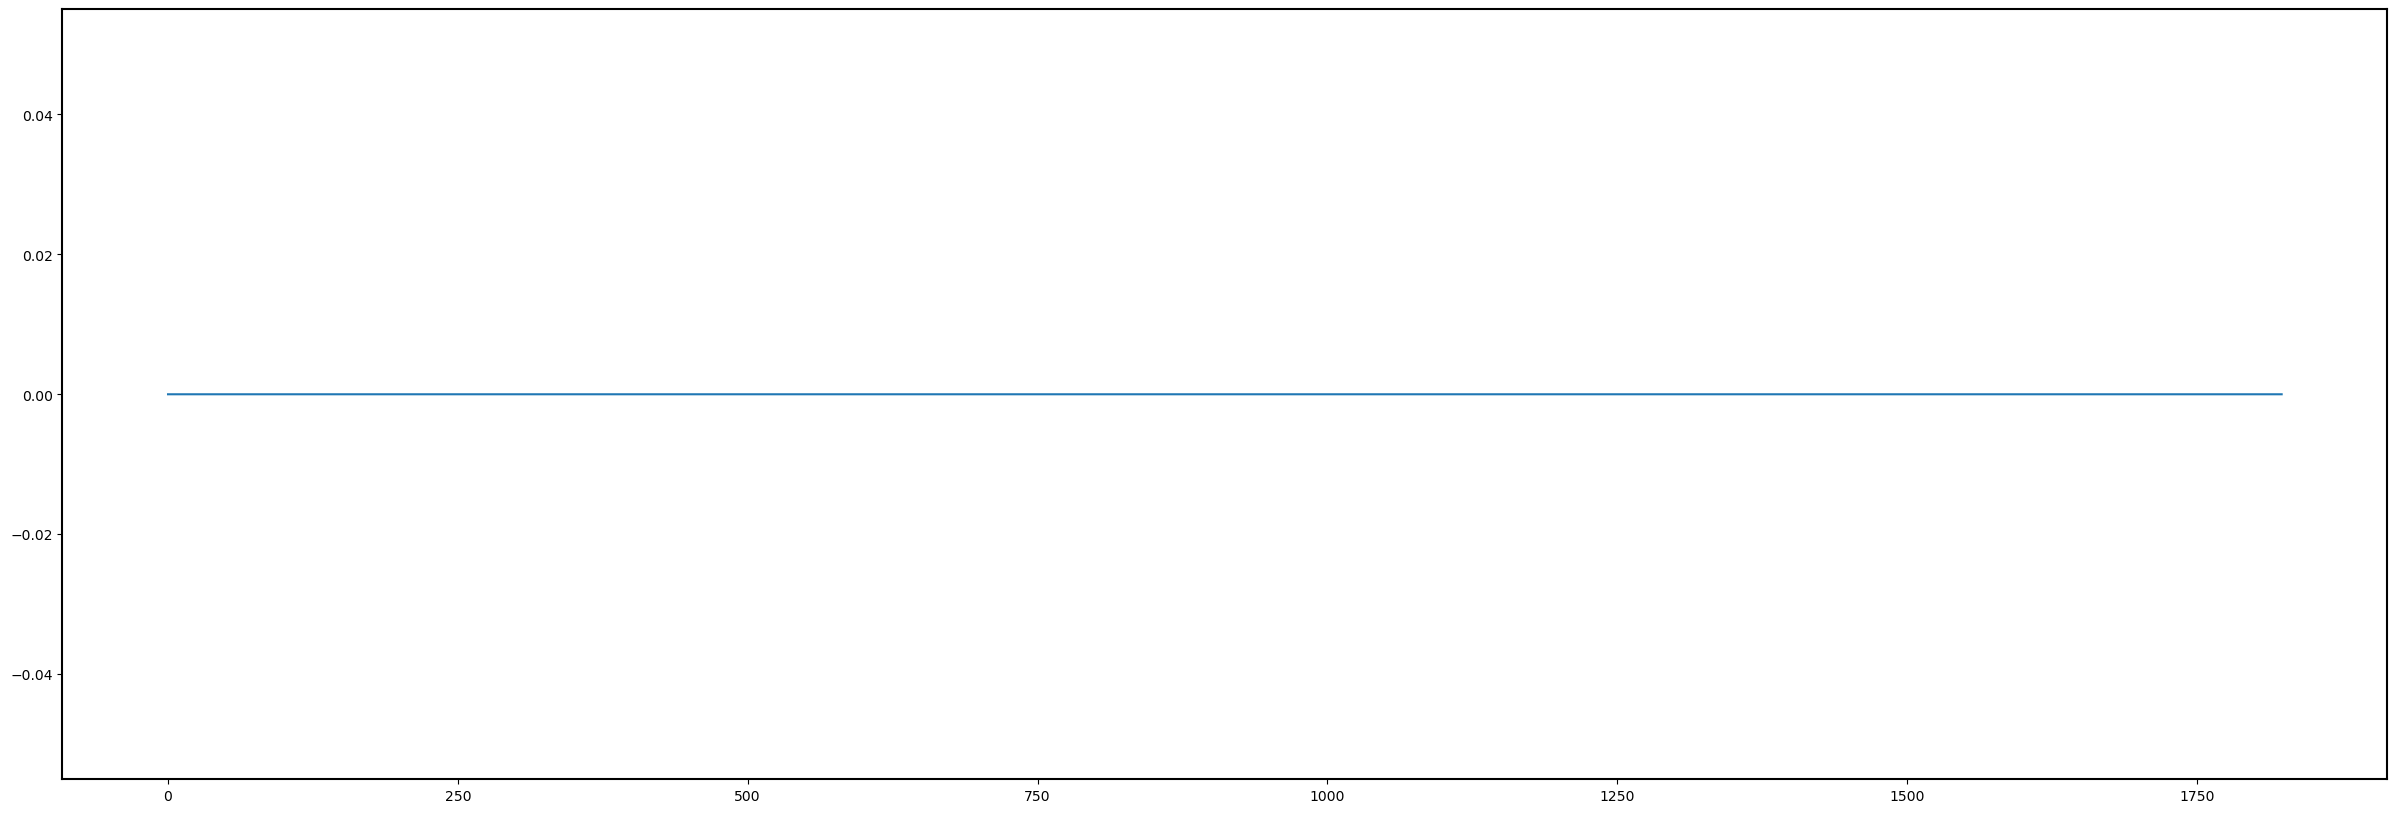

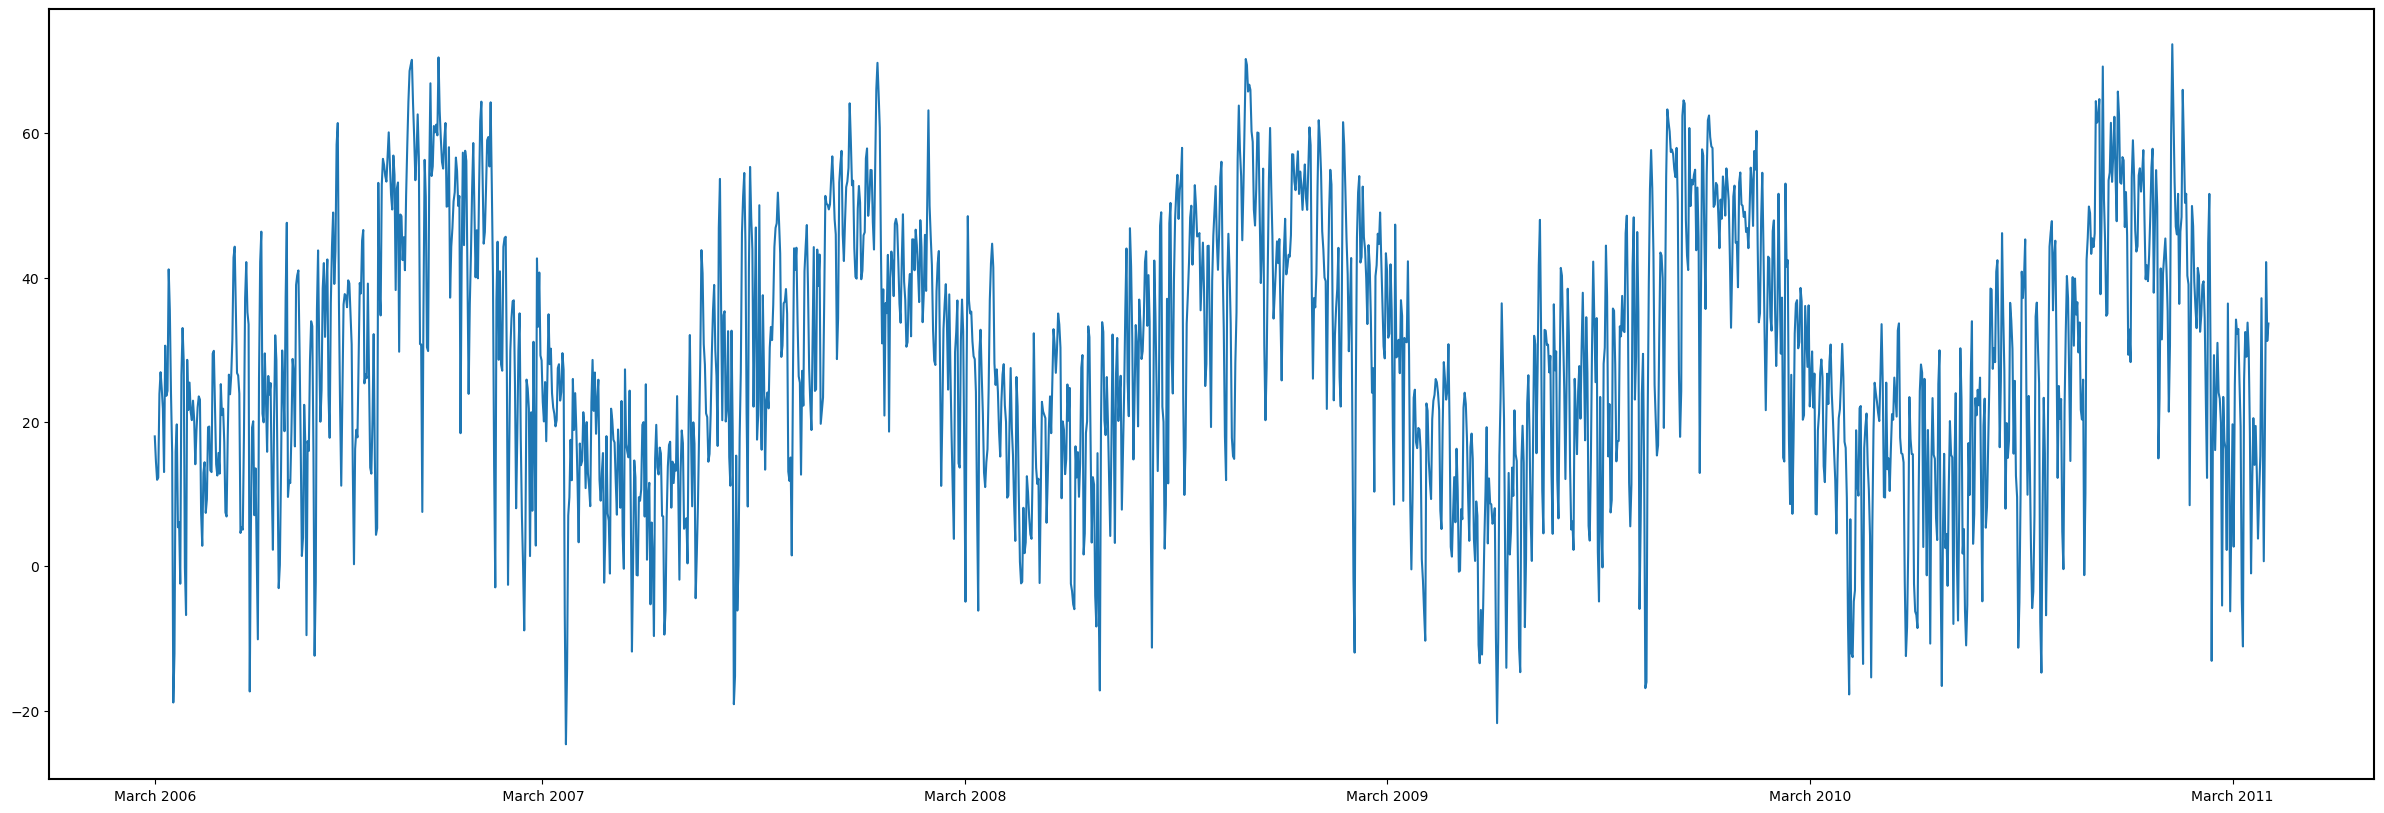

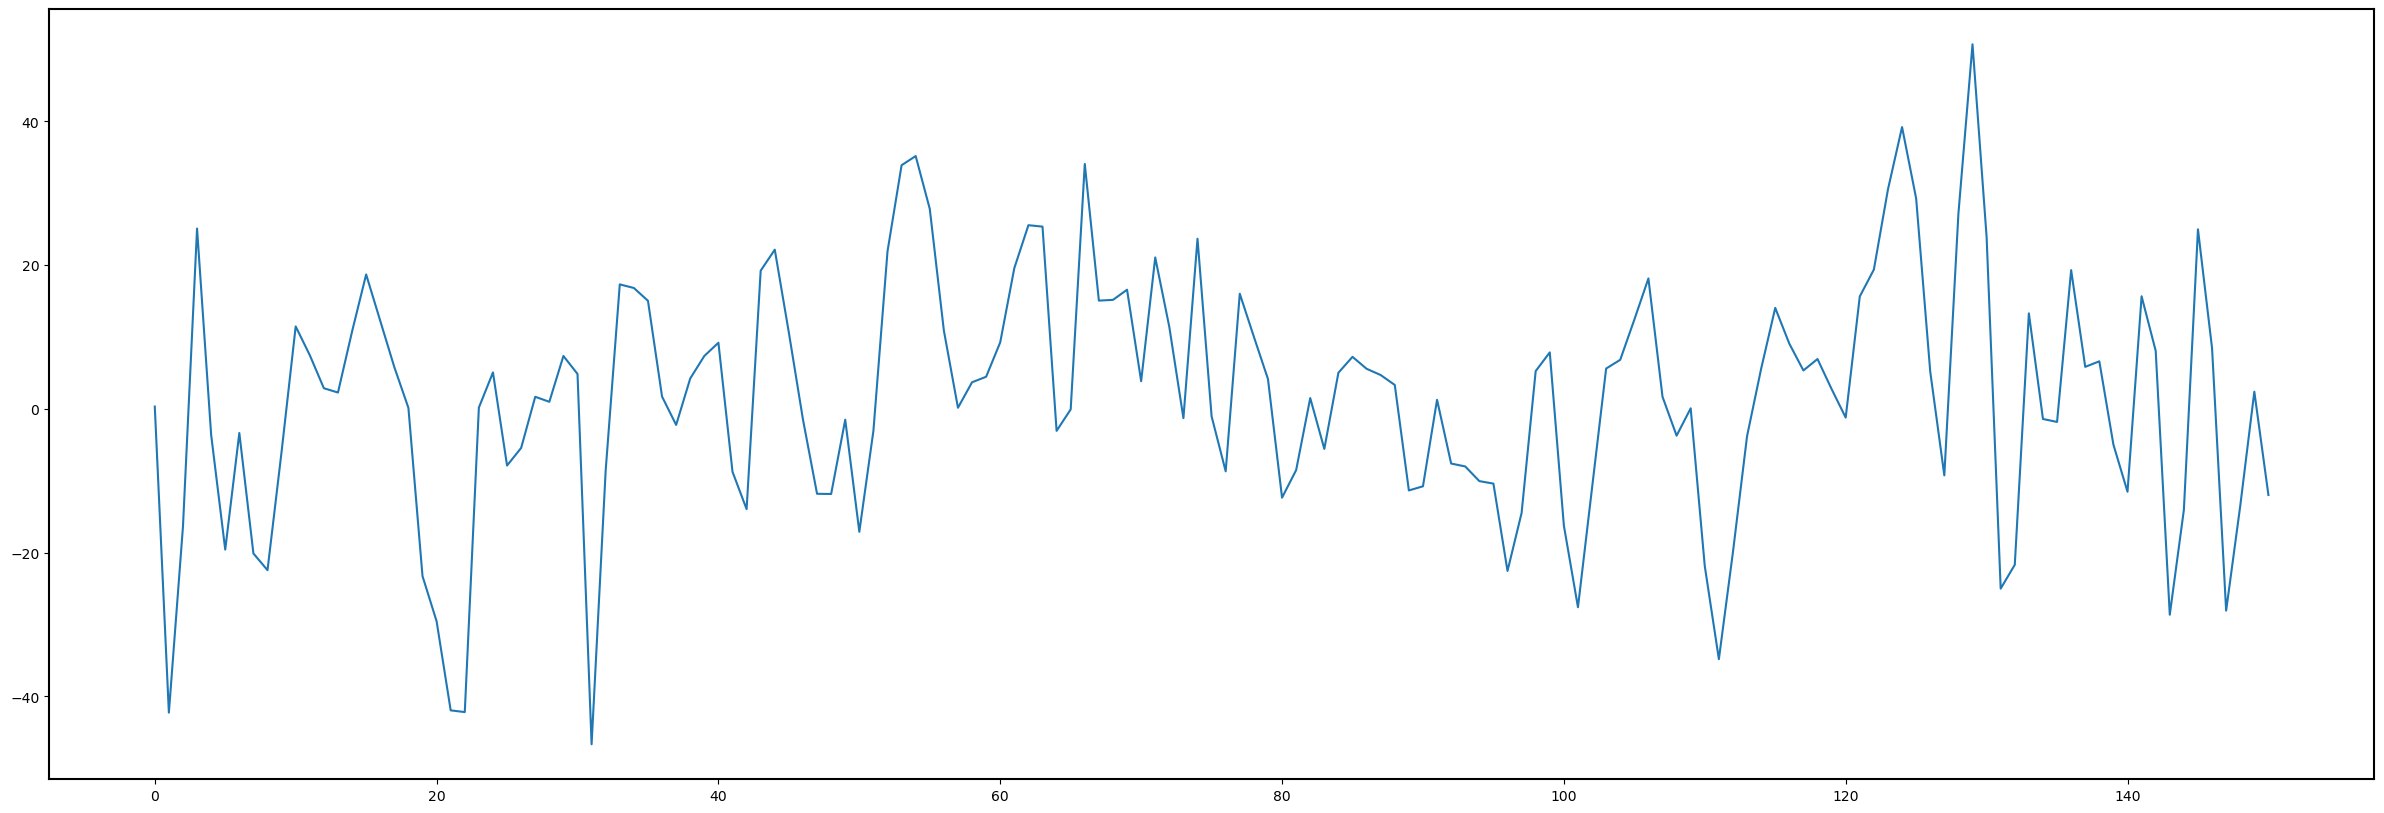

In [5]:
import xarray as xr
import netCDF4 as nc
from scipy.interpolate import NearestNDInterpolator, RegularGridInterpolator, griddata
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import sys
from PIL import Image
from statsmodels.tsa.seasonal import STL
#numpy.set_printoptions(threshold=sys.maxsize)

    
def getloc(array, value):
    # function which gets the location of all pixels greater than the threshold value
    # and sums their area. If the area is less than <10% of the array, return the locations
    # This threshold is set to avoid getting clusters that take up the majority of the array
    # as seen in the case of Zaporizhzhia Nuclear Power Station. The aim is to distinguish 
    # small intensities that are consistently over the region instead of transient.
    loc = []
    area = []
    
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] > value:
                loc.append((i,j))
                area.append(1)
   
    sum_area = np.sum(area)
   
    # if the area is greater than a 10th of the array ignore not dispersed or small enough.
    # Could use a Moran's I or Gearcy C test statistic to determine the spatial correlation
    # of clusters. i.e. if dispersed morans statistic and area is low then it is a suitable cluster.
    if sum_area>1000:
        loc = []
        print('Reason Skipped: area too large -->', sum_area)
        return loc

    elif sum_area < 1000 and sum_area > 5:
        print('area: ',sum_area)
        return loc

    else: 
        loc = []
        print('Reason Skipped: Not Suitable -->', sum_area)
        return loc


# function that does what crossCheck does but for 4 arrays
def crossCheck4(array1, array2, value1a, value1b, main_location):
    loc1 = getloc(array1, value1a)
    loc2 = getloc(array2, value1b)
    # Can be varied to include more arrays for longer prolonged clusters
    #loc3 = getloc(array3, value1c)
    #loc4 = getloc(array4, value1d)
    print('2')
    loc = []
    for i in loc1:
        if i in loc2: #and i in loc3: #and i in loc4:
            loc.append(i)

    # The main NPP location with a +- 5 pixel radius equating to 10% of the 10 by 10 array
    main_location = [(main_location[0] + i, main_location[1] + j) for i in range(-10, 10) for j in range(-10, 10)]

    # check if any points in the list of locations are in the list of main locations
    points = []
    for i in loc:
        if i in main_location:
            points.append(i)

    # if there are no points in the list of locations that are in the list of main locations, return False
    if len(points) == 0:
        return False
    else:
        return True

def getMonthStats(dataset, start, end, month):
    
    # the dataset is a 3D array of 2D arrays
    # set the index to be a freqency of a day starting from the given date
    dataset.index = pd.date_range(start, end, freq='D')
    

    # loop through the index and store the index where the month is equal to the given month
    month_index = []
    for i, date in enumerate(dataset.index):
        if (int(date.month) == int(month)):
            month_index.append(i)

    # loop through the month_index and store the 2D array at each index in a new 3D array
    month_data = []
    for i in month_index:
        month_data.append(dataset[i])
    month_data = np.array(month_data)


    # plot the data for the given month
    #month_data.plot()
    #plt.show()

    # get the mean of each pixel from each 2D array in the 3D array dataet
    month_mean = np.mean(month_data, axis = 0)
    
    # subtract the month_mean 2D array from each 2D array in the 3D array dataset
    month_anomaly = month_data - month_mean
    means = np.mean(month_anomaly[:,6:7,6:7], axis=(1,2))
    
    # plot the data for the given month
    fig = plt.figure()
    plt.axhline(y = 2*np.std(means), color = 'r', linestyle = '-')
    plt.plot(means)
    plt.show()


    return month_anomaly



def interpolate_data(file_name, new_shape=(100, 100)):
    ###################################################################################
    # Methodology proposed by V. Tramutoli and altered by Ouzounov D for OLR
    ###################################################################################

    dataset = nc.Dataset(file_name)
    olr = dataset.variables["olr"][:]
    
    ds = xr.open_dataset(file_name)
    outgoing_longwave_radiation = ds["olr"]
    
    # difference between the current value and the spatial average at that current time
    current_array = olr[:,:,:]
    spatial_average = np.mean(current_array, axis = (0))
    
    # forming the array that is the difference between the current array and the spatial average
    diff_array = np.zeros((current_array.shape[0],10,10))
    diff_array[:,:,:] = olr[:,:,:] - spatial_average[:,:]

    # difference from time averaged values for that area. 
    #all_time_spatial_average = np.mean(olr[:,:,:], axis=(0))
    #timeavg_array = np.zeros((current_array.shape[0],10,10))
    #timeavg_array[:,:,:] = olr[:,:,:] - all_time_spatial_average
    
    # standard deviation for the values over time
    std = np.std(spatial_average)
    olr_anomaly = diff_array

    # iterate through the length of olr variables
    interpolated_data = np.zeros((1827,100,100))
    for i in range (0, outgoing_longwave_radiation.shape[0]):
        
        if i in range(0, 1827):
            time_dim = outgoing_longwave_radiation.dims[0]

            lon_var = ds.variables['lon']
            lon_data = lon_var[:].values
            lat_var = ds.variables['lat']
            lat_data = lat_var[:].values
            olr_array = olr_anomaly[i]
            old_shape = olr_array.shape[0:]
            old_grid_x, old_grid_y = np.mgrid[0:1:old_shape[0]*1j, 0:1:old_shape[1]*1j]
            new_grid_x, new_grid_y = np.mgrid[0:1:new_shape[0]*1j, 0:1:new_shape[1]*1j]

            interpolated_data_new = griddata((old_grid_x.ravel(), old_grid_y.ravel()),
                                        olr_array.reshape(-1),
                                        (new_grid_x, new_grid_y),
                                        method="cubic")
            interpolated_olr = interpolated_data_new.reshape(new_shape)
            interpolated_data[i] = interpolated_olr
                                    
    return interpolated_data, lon_data, lat_data


def plot_surf(data, long, lat, i):

    # function that used matpltlib to display a surf plot in top down view for the chosen case study

    fig  = plt.figure()
    data = np.nan_to_num(np.maximum(data, 0))
    ax = plt.axes(projection='3d')
    x = np.arange(data.shape[0])
    y = np.arange(data.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = data
    
    surf = ax.plot_surface(X, Y, data,cmap=plt.cm.Reds, edgecolor='none', vmin = 2*np.std(data), alpha=0.75)
    ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude"); ax.set_zlabel("OLR [W/m^2]")
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(90,-90) #90,-90
    # for Zaporizhzhia Nuclear Power Station ax.view_init(0,0) due to structure of import

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    max_val = np.max(data.flatten())
    cset = ax.contour(X, Y, data, zdir='z', offset=max_val, cmap=plt.cm.Reds, vmin = 2*np.std(data), alpha = 0.75)
    # ax.w_zaxis.line.set_lw(0.)
    ax.set_zlabel('')
    ax.set_zticks([])
    xlocs, xlabels = plt.xticks()
    
    # For Zaporizhzhia Nuclear Power Statio due to structure of import
    #ax.set_ylim(ax.get_ylim()[::-1])

    ax.set_xticks([5, 25, 50, 75, 95], [long[0],long[1],long[2],long[3], long[4]], rotation=30)
    ax.set_yticks([5, 25, 50, 75, 95], [lat[0],lat[1],lat[2],lat[3], lat[4]], rotation=0)

    ax.get_zaxis().set_visible(False)
    ax.grid(False)
    plt.rcParams['axes.linewidth'] = 1.5
    plt.figure(facecolor="w")
    ax.scatter(65, 70, max_val, s=40, marker='o', color='k')
    ax.set_title("{} to {} ".format(i-1, i), fontsize=10)

    # data accessible by https://psl.noaa.gov/mddb2/showDataset.html?datasetID=37 for 1 by 1 degree dataset
    # or https://psl.noaa.gov/data/gridded/data.uninterp_OLR.html for 2.5 by 2.5 degree dataset
    fig.savefig("D:/Dissertation-2542000/RP3/OLR/Plots/olr_{}.svg".format(i),format='svg', dpi=5)
    
    plt.show()
    
def get_ranges():
    ranges = [(334, 365), (700, 730), (1066, 1096), (1432, 1462), (1766,1796)]
    result = []
    for r in ranges:
        start, end = r
        result.append((start, end))
    return result


def add_stl_plot(fig, axs, res, labels=None):

    series = res.resid
    print('series: ',series[0])
    print('series1: ',series[1])

    # Plot vertical lines up to each data point
    for i, value in enumerate(series):
        print('i:',i)
        print('value: ',value)
        axs.vlines(i, 0, value, colors='blue', linestyles='solid')
    
    fig.savefig("D:/Dissertation-2542000/RP3/OLR/Plots/olr.svg",format='svg', dpi=5)
    plt.show()

# Isolation Forest implementation for anomaly detection which was not implemented in the final version
# since anomalies were not detectable by time series. However, the code is left here for future reference.
# Isolation Forests are an unsupervised machine learning algorithm which would be suitable for the usecase of 
# an analytics platform (future work).
 
# def model(data):
#     df = data
#     df.columns =['OLR']
#     model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
#     model.fit(df[['OLR']])
#     df['scores']=model.decision_function(df[['OLR']])
#     df['anomaly']=model.predict(df[['OLR']])
#     anomaly=df.loc[df['anomaly']==-1]
#     anomaly_index=list(anomaly.index)
    
#     fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))
#     ax0.plot(anomaly.index,anomaly['OLR'], marker=11)
#     #ax0.set_xlim([-10, 160])
#     ax0.axhline(y = np.std(df['OLR']), color = 'b', linestyle = '--',label = "std")
#     ax0.axhline(y = 2* np.std(df['OLR']), color = 'b', linestyle = '-.',label = "2std")
    
#     return anomaly.index, anomaly['OLR']   
    
def main(): 

    # data accessible by https://psl.noaa.gov/mddb2/showDataset.html?datasetID=37 for 1 by 1 degree dataset
    # or https://psl.noaa.gov/data/gridded/data.uninterp_OLR.html for 2.5 by 2.5 degree dataset
    file_name = "D:/Dissertation-2542000/RP3/OLR/testOLR.nc"
    interpolated_data, long, lat= interpolate_data(file_name)
    
    avg = np.array([])
    for i in range(0,1826):
        data = (interpolated_data[i]+interpolated_data[i-1])/2
        
        if i in range(1797,1826):
            plot_surf(data, long, lat, i)

            # exporting a specific array if required
            #if i == 1:
            #    d = pd.DataFrame(data)
            #    d.to_csv('out.csv', index=False)

        # Refined data refers to the directly above the region of interest. [:,:] for example can be changed to [55:75,55:75]
        # for Fukushima Daiichi Nuclear Power Plant to get the array values directly above the NPP.
        data_refined = np.max(data[:,:])
        avg = np.append(avg, data_refined)

    # the retrieval or just data in the periods of march from the dataset
    # specifically over the power plant
    march_avg = np.array([])
    ranges = get_ranges()
    for start, end in ranges:
        for i in range(start,end):
            data = (interpolated_data[i]+interpolated_data[i-1])/2
            data_refined = np.max(data[55:75,55:75])
            march_avg = np.append(march_avg, data_refined)

    # Seasonal Trend Decomposition with LOESS via the statsmodels library with seasonality of 365 days
    avg_df = pd.DataFrame(avg, columns=['OLR'])
    avg_df.index = range(0, len(avg_df))
    print(avg_df)
    stl = STL(avg_df, period=365)
    res_robust = stl.fit()
    res_robust.plot()
    plt.show()
    print(res_robust)
    fig, ax = plt.subplots(1,1, figsize = (30,10))
    ax.set_xticks([0, 334, 700, 1064, 1429, 1794], ['March 2006', ' March 2007', 'March 2008', 'March 2009', 'March 2010', 'March 2011'])
    add_stl_plot(fig, ax, res_robust, ["Robust"])

    point = []
    
    # looping through the interpolated data to get two consecutive two day averages,
    # getting the std and mean for each of the two days then calling the crosscheck function
    # which checks for values greater than 2std of the mean and if the location is consistent.
    for i in range(1, 1825):
        
        data1 = (interpolated_data[i]+interpolated_data[i-1])/2
        data2 = (interpolated_data[i+1]+interpolated_data[i])/2
        
        # get the mean and std and 2std of the arrays
        mean1 = np.mean(data1)
        std1 = np.std(data1)
        print('std1: ',std1)
        per1 = mean1 + (2*std1)
        
        mean2 = np.mean(data2)
        std2 = np.std(data2)
        per2 = mean2 + (2*std2)

        check = crossCheck4(data1, data2, per1, per2, (65,70))
        
        # if check is false, add a 0 to the point list
        # if check is true, add a 1 to the point list
        # this is so that the points can be plotted on a graph

        if check == False:
            point.append(0)
        else:
            point.append(1)
            

    # handling the plotting
    fig10, ax10 = plt.subplots(1,1, figsize = (30,10))
    ax10.plot(point)
    #ax10.set_xticks([0, 334, 700, 1064, 1429, 1794], ['March 2006', ' March 2007', 'March 2008', 'March 2009', 'March 2010', 'March 2011'], rotation=30)
    #fig10.savefig("C:/path/to/save/points/olr_points.svg")

    fig11, ax11 = plt.subplots(1,1, figsize = (30,10))
    ax11.plot(avg)
    ax11.set_xticks([0, 334, 700, 1064, 1429, 1794], ['March 2006', ' March 2007', 'March 2008', 'March 2009', 'March 2010', 'March 2011'])
    #fig11.savefig("C:/path/to/save/points/olr_points.svg")

    fig12, ax12 = plt.subplots(1,1, figsize = (30,10))
    ax12.plot(march_avg)
    #ax12.set_xticks([0, 334, 700, 1064, 1429, 1794], ['March 2006', ' March 2007', 'March 2008', 'March 2009', 'March 2010', 'March 2011'])
    #fig12.savefig("C:/path/to/save/points/olr_points.svg")
    plt.show()

    df = pd.DataFrame(avg)
    df.to_csv("avgfukuall_olr.csv", header=None)

main()

